In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Retrieve Quaterback DataFrame 
# from "Importing Data & Statistical Correlation" Jupyter Notebook
%store -r qb

In [3]:
# Clean qb DataFrame
new_qb = qb.drop(columns=['Player','Tm','FantPos','PPR','DKPt','FDPt',
                          'VBD','PosRank','OvRank','2PM','2PP','Y/A',
                          'Y/R','G'],axis=1)

new_qb['FantPt'] = new_qb['FantPt'].astype(np.int64)
new_qb['Year'] = new_qb['Year'].astype(np.int64)

In [4]:
# Get rid of current year points and shift up next years FantPts
y_qb = new_qb['FantPt']
conv_years = [1 if values == 2018 else 0 for values in new_qb.Year]
new_qb['Year'] = conv_years
X_qb = new_qb.drop(columns=['FantPt'],axis=1)

In [5]:
X_qb.head()

,Age,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Tgt,Rec,Yds.2,TD.2,Fmb,FL,TD.3,Year
0,23,16,383,580,5097,50,12,60,272,2,0,0,0,0,9,2,2,1
1,33,16,422,608,4924,35,7,33,125,3,1,1,5,1,10,5,4,1
2,36,16,452,675,5129,34,16,31,98,3,1,1,-1,0,7,2,3,1
3,23,16,345,505,4165,26,9,99,551,5,0,0,0,0,9,3,5,1
4,29,16,430,639,4593,39,15,46,148,0,2,1,4,0,6,1,0,1


In [6]:
y_qb.head()

0    417
1    354
2    341
3    332
4    327
Name: FantPt, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_qb,y_qb,test_size=0.275,
                                                    random_state=411)

In [9]:
# Creating Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Scoring the Linear Regression Model
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("Linear Regression Train Score:", train_score.round(8))
print("Linear Regression Test Score:", test_score.round(8))
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(8)))

Linear Regression Train Score: 0.99847602
Linear Regression Test Score: 0.99886406
Root Mean Squared Error: 2.66563289


In [24]:
# Random Forest Regression Scores
rf = RandomForestRegressor(n_estimators=2000)
rf.fit(X_train, y_train)
# Scoring the Random Forrest Regression Model
RF_train_score = rf.score(X_train,y_train)
RF_test_score = rf.score(X_test, y_test)
print("Random Forest Regression Train Score:", RF_train_score.round(8))
print("Random Forest Regression Test Score:", RF_test_score.round(8))
# Predict on the test data: y_pred_rf
y_pred_rf = rf.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Random Forest Regression Train Score: 0.99156639
Random Forest Regression Test Score: 0.91633798
Root Mean Squared Error: 22.87634


In [ ]:
# Random Forest Regression does not have coefficients so we cannot visualize

In [ ]:
# Ridge Regression Analysis
# Higher the alpha, more restriction on the coefficients; 
# Low alpha, more generalization
# Coefficients are barely restricted and in this case Linear
# and Ridge Regression resembles comparison with alpha value

In [11]:
# Creating Ridge Regression Model - Low Alpha
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print("Ridge Regression Train Score Low Alpha:", Ridge_train_score.round(8))
print("Ridge Regression Test Score Low Alpha:", Ridge_test_score.round(8))
# Predict on the test data: y_pred
y_pred_rr = rr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print("Root Mean Squared Error: {}".format(rmse.round(8)))

Ridge Regression Train Score Low Alpha: 0.99847601
Ridge Regression Test Score Low Alpha: 0.99886415
Root Mean Squared Error: 2.66552811


In [12]:
# Ridge Regression Analysis - High Alpha
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("Ridge Regression Train Score High Alpha:", Ridge_train_score100.round(8))
print("Ridge Regression Test Score High Alpha:", Ridge_test_score100.round(8))
# Predict on the test data: y_pred
y_pred_rr100 = rr100.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr100))
print("Root Mean Squared Error: {}".format(rmse.round(8)))

Ridge Regression Train Score High Alpha: 0.99797109
Ridge Regression Test Score High Alpha: 0.99720799
Root Mean Squared Error: 4.17908118


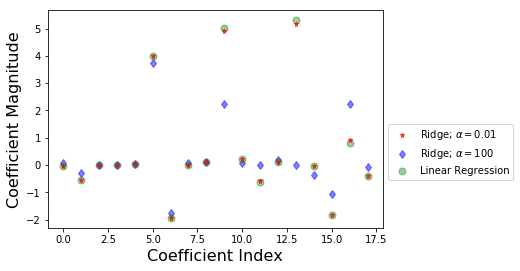

In [13]:
# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Ridge Regression Coefficient - High Alpha
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Ridge; $\alpha = 100$') 

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# This plot is a viual display of how the lower alpha better fits our dataset

In [17]:
# Lasso Scores for 0.01 Alpha
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print("Lasso Training Score for Alpha=0.01:", train_score01.round(8))
print("Lasso Test Score for Alpha=0.01:", test_score01.round(8))
print("Number of Features Used for Alpha=0.01:", coeff_used01)
# Predict on the test data: y_pred_lasso01
y_pred_lasso01 = lasso01.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso01))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.01: 0.99847306
Lasso Test Score for Alpha=0.01: 0.99884482
Number of Features Used for Alpha=0.01: 17
Root Mean Squared Error: 2.68812


In [18]:
# Lasso Scores for 0.0001 Alpha
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score0001 = lasso0001.score(X_train,y_train)
test_score0001 = lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("Lasso Training Score for Alpha=0.0001:", train_score0001.round(8))
print("Lasso Test Score for Alpha=0.0001: ", test_score0001.round(8))
print("Number of Features Used for Alpha=0.0001:", coeff_used0001)
# Predict on the test data: y_pred_lasso0001
y_pred_lasso0001 = lasso0001.predict(X_test)
# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso0001))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.0001: 0.99847602
Lasso Test Score for Alpha=0.0001:  0.9988639
Number of Features Used for Alpha=0.0001: 18
Root Mean Squared Error: 2.66582


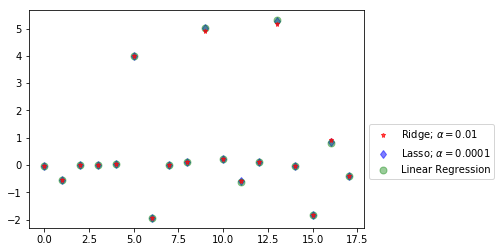

In [19]:
# Linear Regression scores plot with Ridge Regression & Lasso Coefficient

# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Lasso Regression Coefficient - Alpha 0.0001
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Lasso; $\alpha = 0.0001$')

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.legend(bbox_to_anchor=(1, 0.5))

In [ ]:
# Ridge Regression with the lowest Alpha (0.01) gives us the best fit
# for this dataset
# The Random Forest Regression model was the worst of all the models tested
# Lasso Regression with the lowest Alpha (0.0001) was very close behind Ridge

In [20]:
# Predicting QBs with Linear Regression
top20_qbs = X_qb[:20]
y_top20_qbs = lr.predict(top20_qbs)
# Creating DataFrame to Visualize Prediction Results
y_top20_qbs = pd.DataFrame(y_top20_qbs)
qb_names = qb['Player'][:20]
frames = [qb_names, y_top20_qbs]
qb_names_pred = pd.concat(frames, axis=1)
qb_names_pred.columns = ['Player', 'Predicted FantPt']
qb_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Patrick Mahomes,421.123867
1,Matt Ryan,354.722265
2,Ben Roethlisberger,338.257306
3,Deshaun Watson,336.338449
4,Andrew Luck,327.731909
5,Aaron Rodgers,310.901575
6,Jared Goff,310.000000
7,Drew Brees,302.960160
8,Russell Wilson,298.127087
9,Dak Prescott,285.204834


In [21]:
# Predicting QBs with Ridge Regression
top20_qbs = X_qb[:20]
y_top20_qbs_rr = rr.predict(top20_qbs)
# Creating DataFrame to Visualize Prediction Results
y_top20_qbs_rr = pd.DataFrame(y_top20_qbs_rr)
qb_names = qb['Player'][:20]
frames = [qb_names, y_top20_qbs_rr]
qb_names_pred = pd.concat(frames, axis=1)
qb_names_pred.columns = ['Player', 'Predicted FantPt']
qb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Patrick Mahomes,421.110819
1,Matt Ryan,354.696918
2,Ben Roethlisberger,338.254651
3,Deshaun Watson,336.330410
4,Andrew Luck,327.734440
5,Aaron Rodgers,310.894333
6,Jared Goff,310.091838
7,Drew Brees,302.957782
8,Russell Wilson,298.127463
9,Dak Prescott,285.195101


In [22]:
# Predicting QBs with Lasso Regression
top20_qbs = X_qb[:20]
y_top20_qbs_Lasso = lasso0001.predict(top20_qbs)
# Creating DataFrame to Visualize Prediction Results
y_top20_qbs_Lasso = pd.DataFrame(y_top20_qbs_Lasso)
qb_names = qb['Player'][:20]
frames = [qb_names, y_top20_qbs_Lasso]
qb_names_pred = pd.concat(frames, axis=1)
qb_names_pred.columns = ['Player', 'Predicted FantPt']
qb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Patrick Mahomes,421.121726
1,Matt Ryan,354.716383
2,Ben Roethlisberger,338.257908
3,Deshaun Watson,336.337297
4,Andrew Luck,327.730114
5,Aaron Rodgers,310.901175
6,Jared Goff,310.020558
7,Drew Brees,302.960469
8,Russell Wilson,298.128786
9,Dak Prescott,285.199586
